# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [58]:
# your code here

data = pd.read_csv('c:/Users/denis/Desktop/Ironhack/ironhackLabs/module-2/Pivot-Table-Correlation/Employee.csv')  

In [5]:
data.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 1
# your code here
data.groupby('Department').Salary.agg(['mean'])

,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# Method 2
# your code here

data.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [12]:
# your code here

data.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [16]:
# your code here

data.pivot_table(index=["Title"], values=["Years", "Salary"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [44]:
x = data.pivot_table(index=["Title", "Department"], values=["Salary", "Name"], aggfunc={'Salary': np.mean,'Name': 'count'})
# x = x.reset_index()
# x.columns
x

Name  Salary
Title     Department              
VP        HR             1    70.0
          IT             1    70.0
analyst   HR             2    32.5
          IT             2    32.5
associate IT             1    60.0
          Sales          2    55.0

In [25]:
# your code here
data.pivot_table(index=["Title"], values=["Salary", "Name"], aggfunc=['mean', 'count'])

mean count       
              Salary  Name Salary
Title                            
VP         70.000000     2      2
analyst    32.500000     4      4
associate  56.666667     3      3

In [39]:
x[[('Title',       ''), ( 'mean', 'Salary'), ('count',   'Name') ]]

,Title,mean,count
,,Salary,Name
0,VP,70.000000,2
1,analyst,32.500000,4
2,associate,56.666667,3


In [20]:
data.groupby('Department').agg({'Salary':'mean', 'Name':'count'})

,Salary,Name
Department,,
HR,45.00,3
IT,48.75,4
Sales,55.00,2


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [45]:
# your code here
data.pivot_table(index=["Title", "Department"], values=["Salary"], aggfunc=[np.median, min, max, np.std])

median    min    max       std
                     Salary Salary Salary    Salary
Title     Department                               
VP        HR           70.0     70     70       NaN
          IT           70.0     70     70       NaN
analyst   HR           32.5     30     35  3.535534
          IT           32.5     30     35  3.535534
associate IT           60.0     60     60       NaN
          Sales        55.0     55     55  0.000000

In [ ]:
"""
your commments here
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [51]:
# your code here

data.pivot_table(index=["Department", "Salary"], values = ['Name'], aggfunc=['count'])

count
                   Name
Department Salary      
HR         30         1
           35         1
           70         1
IT         30         1
           35         1
           60         1
           70         1
Sales      55         2

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [53]:
# your code here

data.pivot_table(index=["Department", "Title"], values = ['Salary', 'Years'], aggfunc={'Salary': np.mean,'Years': np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [66]:
# your code 

data.sort_values(by=["Salary", "Department"])

KeyError: 'Salary'

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [63]:
# your code here
fitbit = pd.read_csv('c:/Users/denis/Desktop/Ironhack/ironhackLabs/module-2/Pivot-Table-Correlation/Fitbit2.csv')  

In [64]:
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [68]:
# your code here

print(fitbit.dtypes)
print(fitbit.describe())

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object
       Calorie burned         Steps    Distance      Floors  \
count      

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [69]:
# your code here

fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [70]:
import matplotlib.pyplot as plt;

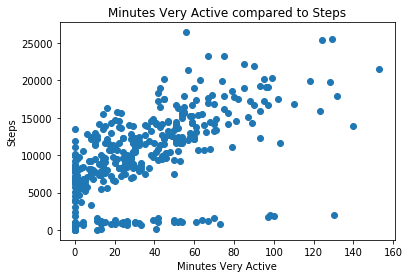

In [75]:
x = fitbit['Minutes Very Active']
y = fitbit["Steps"]
plt.scatter(x, y)
plt.title("Minutes Very Active compared to Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here. There seems to be two thing happening, either the number of steps increase by the number of minutes active, 
or the number of steps remain close to zero, but the minutes active increases (perhaps floor exercises?)
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [76]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

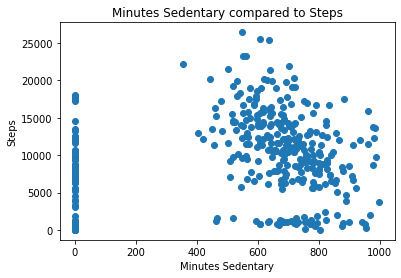

In [77]:
# your code here
x = fitbit['Minutes Sedentary']
y = fitbit["Steps"]
plt.scatter(x, y)
plt.title("Minutes Sedentary compared to Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
your commments here Something weird is going on with the fitbit! 
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [78]:
# your code here

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

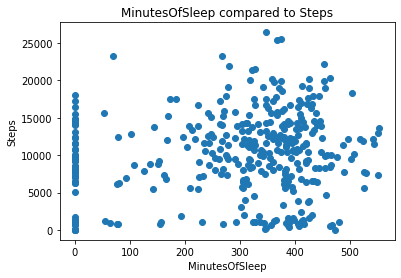

In [79]:
# your code here
x = fitbit['MinutesOfSleep']
y = fitbit["Steps"]
plt.scatter(x, y)
plt.title("MinutesOfSleep compared to Steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [80]:
cor_fit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

In [83]:
# your code here
# cor_fit.head()
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here
#Minutes sedentary and minutes very active 

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [86]:
# your code here
time_grades = pd.read_excel('c:/Users/denis/Desktop/Ironhack/ironhackLabs/module-2/Pivot-Table-Correlation/timeGrades.xlsx')  

In [87]:
time_grades.head(10)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

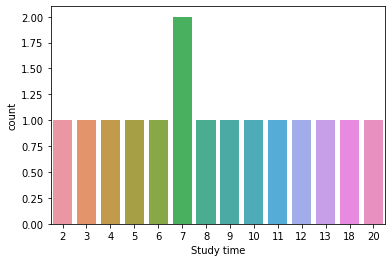

In [88]:
# your code here
import seaborn as sns

ax = sns.countplot(x="Study time",data=time_grades)


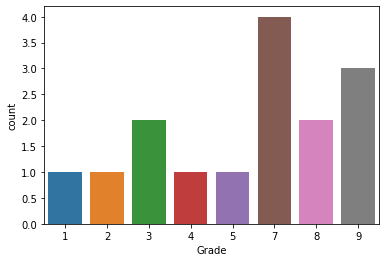

In [89]:

ax = sns.countplot(x="Grade",data=time_grades)

In [91]:
# time_grades.plot.bar(x="Grade", y="Study time")

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [93]:
# your code here
time_grades.corr(method='pearson')


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [94]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [117]:
time_grades.pivot_table(index=["Grade"], values = ['Study time'], aggfunc={'Study time': np.mean}).plot
# print(new)

Text(0, 0.5, 'mean Study time by Grade')

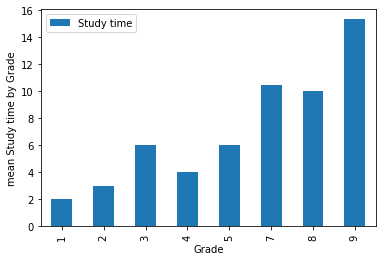

In [121]:
# your code here
time_grades.pivot_table(index=["Grade"], values = ['Study time'], aggfunc={'Study time': np.mean}).plot.bar()
plt.ylabel('mean Study time by Grade')
# x = new['Grade']
# y= new['Study time']
# plt.bar(x, y, align='center')

In [ ]:
"""
your commments here: as children go to higher grades, they have to study more
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""